In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

#### Read the data

In [10]:
df = pd.read_csv("../data/employee_attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [11]:
print(df['Attrition'].value_counts())

Attrition
No     1233
Yes     237
Name: count, dtype: int64


Accuracy of logistic regression classifier on test set: 0.87
Accuracy of logistic regression classifier on train set: 0.83
Accuracy of logistic regression classifier on test set using cross validation: 0.83
Confusion matrix of logistic regression classifier on test set: 
[[256   0]
 [ 38   0]]
Accuracy of random forest classifier on test set: 0.89
Accuracy of random forest classifier on train set: 1.00
Accuracy of random forest classifier on test set using cross validation: 0.85
Confusion matrix of random forest classifier on test set: 
[[254   2]
 [ 29   9]]
Accuracy of SVM classifier on test set: 0.87
Accuracy of SVM classifier on train set: 0.83
Accuracy of SVM classifier on test set using cross validation: 0.83
Confusion matrix of SVM classifier on test set: 
[[256   0]
 [ 38   0]]


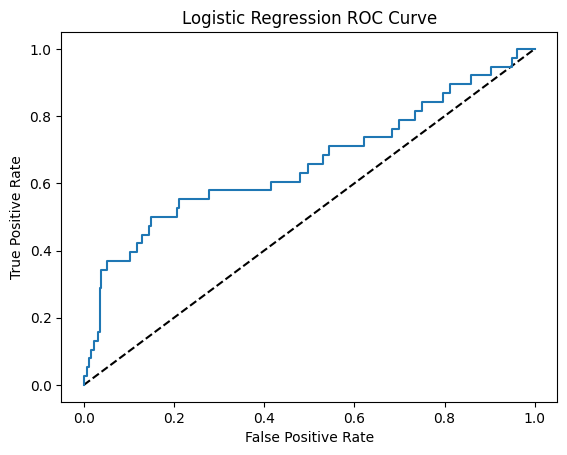

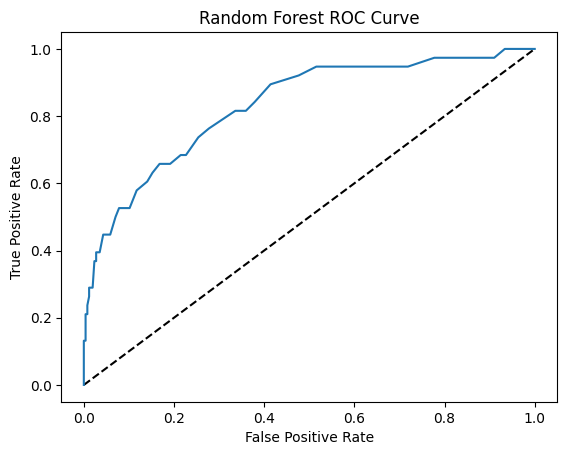

Text(0.5, 1.0, 'SVM ROC Curve')

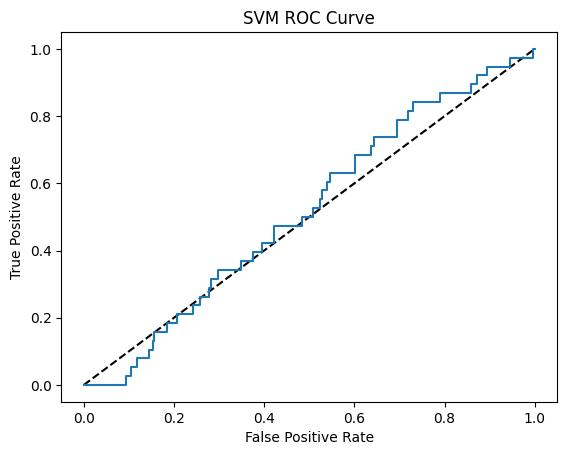

In [20]:
# K-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

# Splitting the data into train and test
import sys
sys.path.append("../")
from src.utils import categorical_to_numerical
df2 = categorical_to_numerical(df, 'Attrition')
X = df2.drop(['Attrition'], axis=1)
y = df2['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set using cross validation: {:.2f}'.format(cross_val_score(logreg, X_train, y_train, cv=10).mean()))
print('Confusion matrix of logistic regression classifier on test set: \n{}'.format(confusion_matrix(y_test, y_pred)))

# Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))
print('Accuracy of random forest classifier on train set: {:.2f}'.format(rf.score(X_train, y_train)))
print('Accuracy of random forest classifier on test set using cross validation: {:.2f}'.format(cross_val_score(rf, X_train, y_train, cv=10).mean()))
print('Confusion matrix of random forest classifier on test set: \n{}'.format(confusion_matrix(y_test, y_pred)))

# SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(X_test, y_test)))
print('Accuracy of SVM classifier on train set: {:.2f}'.format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set using cross validation: {:.2f}'.format(cross_val_score(svm, X_train, y_train, cv=10).mean()))
print('Confusion matrix of SVM classifier on test set: \n{}'.format(confusion_matrix(y_test, y_pred)))
# ROC curve
logreg.fit(X_train, y_train)
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

# ROC curve
rf.fit(X_train, y_train)
y_pred_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

# ROC curve
svm.fit(X_train, y_train)
y_pred_prob = svm.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')


In [21]:
# Oversample the minority class in attrition
from sklearn.utils import resample
df_majority = df[df['Attrition']=='No']
df_minority = df[df['Attrition']=='Yes']
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1233,    # to match majority class
                                 random_state=123) # reproducible results
df = pd.concat([df_majority, df_minority_upsampled])
df['Attrition'].value_counts()


Attrition
No     1233
Yes    1233
Name: count, dtype: int64

Accuracy of logistic regression classifier on test set: 0.66
Accuracy of logistic regression classifier on train set: 0.65
Accuracy of logistic regression classifier on test set using cross validation: 0.64
Confusion matrix of logistic regression classifier on test set: 
[[151  83]
 [ 84 176]]
Accuracy of random forest classifier on test set: 0.96
Accuracy of random forest classifier on train set: 1.00
Accuracy of random forest classifier on test set using cross validation: 0.97
Confusion matrix of random forest classifier on test set: 
[[221  13]
 [  7 253]]
Accuracy of SVM classifier on test set: 0.62
Accuracy of SVM classifier on train set: 0.60
Accuracy of SVM classifier on test set using cross validation: 0.60
Confusion matrix of SVM classifier on test set: 
[[129 105]
 [ 83 177]]


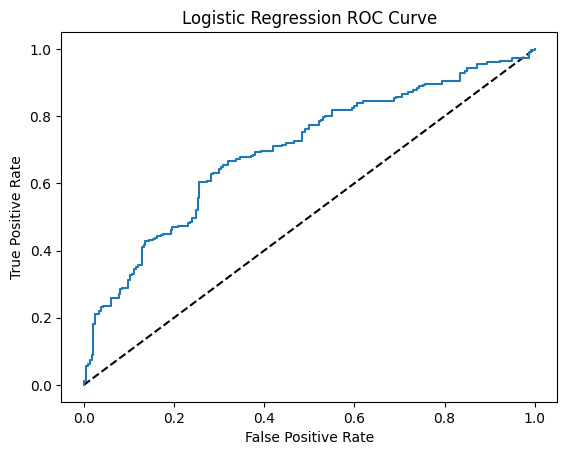

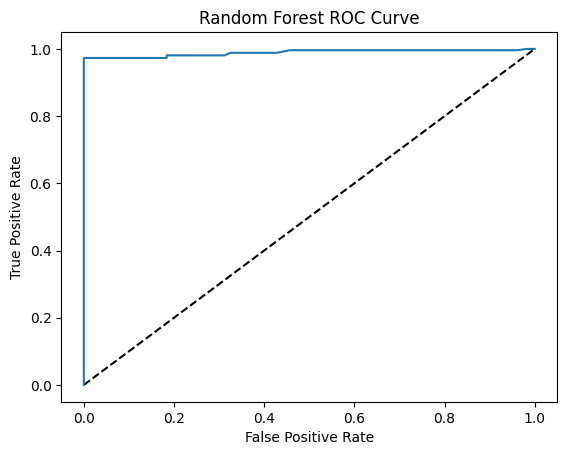

Text(0.5, 1.0, 'SVM ROC Curve')

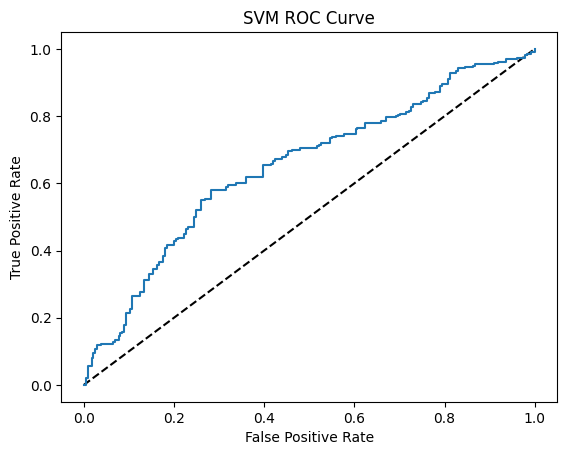

In [22]:
# K-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

# Splitting the data into train and test
from src.utils import categorical_to_numerical
df1 = df.copy().drop(['BusinessTravel', 'Department','Gender', 'JobRole', 'MaritalStatus', 'OverTime','EducationField'], axis=1)
df1 = categorical_to_numerical(df, 'Attrition')
X = df1.drop(['Attrition'], axis=1)
y = df1['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set using cross validation: {:.2f}'.format(cross_val_score(logreg, X_train, y_train, cv=10).mean()))
print('Confusion matrix of logistic regression classifier on test set: \n{}'.format(confusion_matrix(y_test, y_pred)))

# Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))
print('Accuracy of random forest classifier on train set: {:.2f}'.format(rf.score(X_train, y_train)))
print('Accuracy of random forest classifier on test set using cross validation: {:.2f}'.format(cross_val_score(rf, X_train, y_train, cv=10).mean()))
print('Confusion matrix of random forest classifier on test set: \n{}'.format(confusion_matrix(y_test, y_pred)))

# SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(X_test, y_test)))
print('Accuracy of SVM classifier on train set: {:.2f}'.format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set using cross validation: {:.2f}'.format(cross_val_score(svm, X_train, y_train, cv=10).mean()))
print('Confusion matrix of SVM classifier on test set: \n{}'.format(confusion_matrix(y_test, y_pred)))
# ROC curve
logreg.fit(X_train, y_train)
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

# ROC curve
rf.fit(X_train, y_train)
y_pred_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

# ROC curve
svm.fit(X_train, y_train)
y_pred_prob = svm.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')


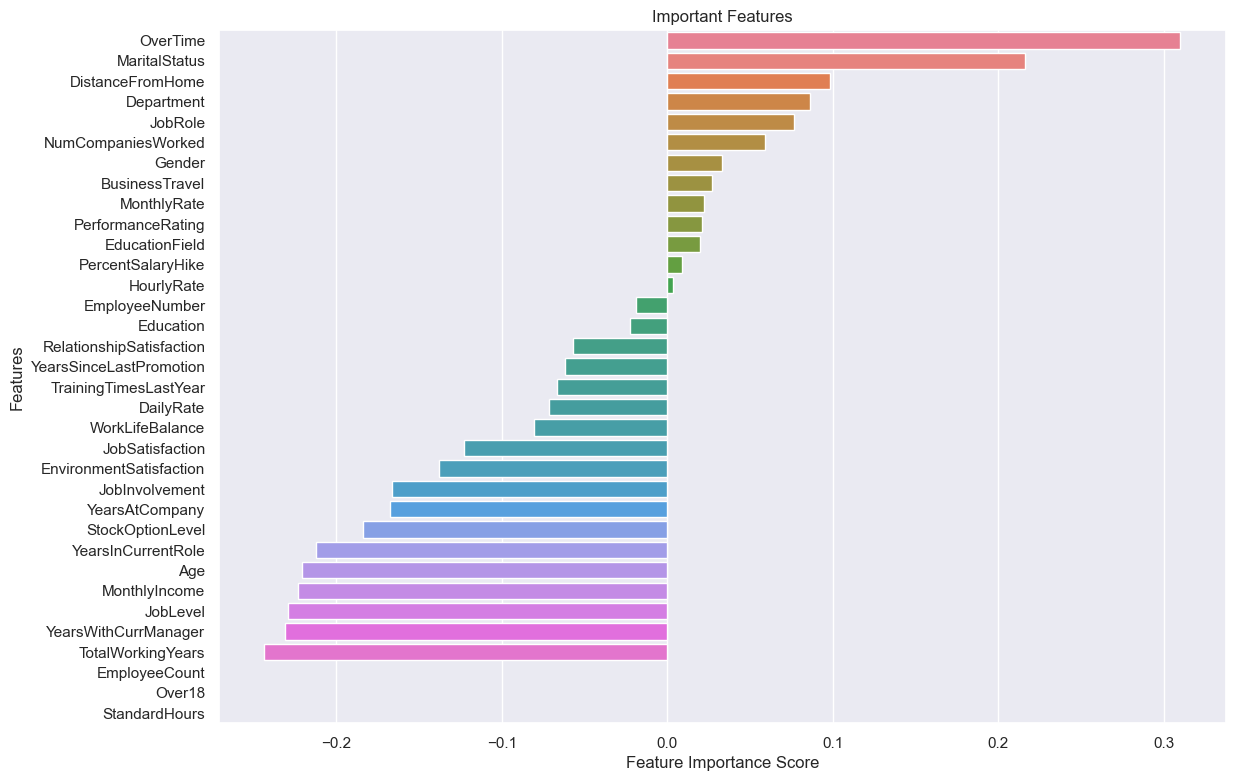

In [23]:
#Plot a bar chart of importance of features by correlation put feature names on y axis and correlation values on x axis
corr = df1.corr()
corr.sort_values(["Attrition"], ascending = False, inplace = True)
sns.set(rc = {'figure.figsize':(13,9)})
sns.barplot(x = corr.Attrition[1:], y = corr.index[1:], palette = 'husl')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")

# Displaying the plot
plt.show()

In [24]:
from src.utils import categorical_to_numerical
df1 = categorical_to_numerical(df, 'Attrition')
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,0,1,1005,1,2,2,1,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,0,2,1324,1,3,3,3,1,10,...,1,80,3,12,3,2,1,0,0,0


Accuracy of logistic regression classifier on test set: 0.66
Accuracy of logistic regression classifier on train set: 0.65
Accuracy of logistic regression classifier on test set using cross validation: 0.64
Confusion matrix of logistic regression classifier on test set: 
[[151  83]
 [ 84 176]]
Accuracy of random forest classifier on test set: 0.96
Accuracy of random forest classifier on train set: 1.00
Accuracy of random forest classifier on test set using cross validation: 0.97
Confusion matrix of random forest classifier on test set: 
[[220  14]
 [  7 253]]
Accuracy of SVM classifier on test set: 0.62
Accuracy of SVM classifier on train set: 0.60
Accuracy of SVM classifier on test set using cross validation: 0.60
Confusion matrix of SVM classifier on test set: 
[[129 105]
 [ 83 177]]


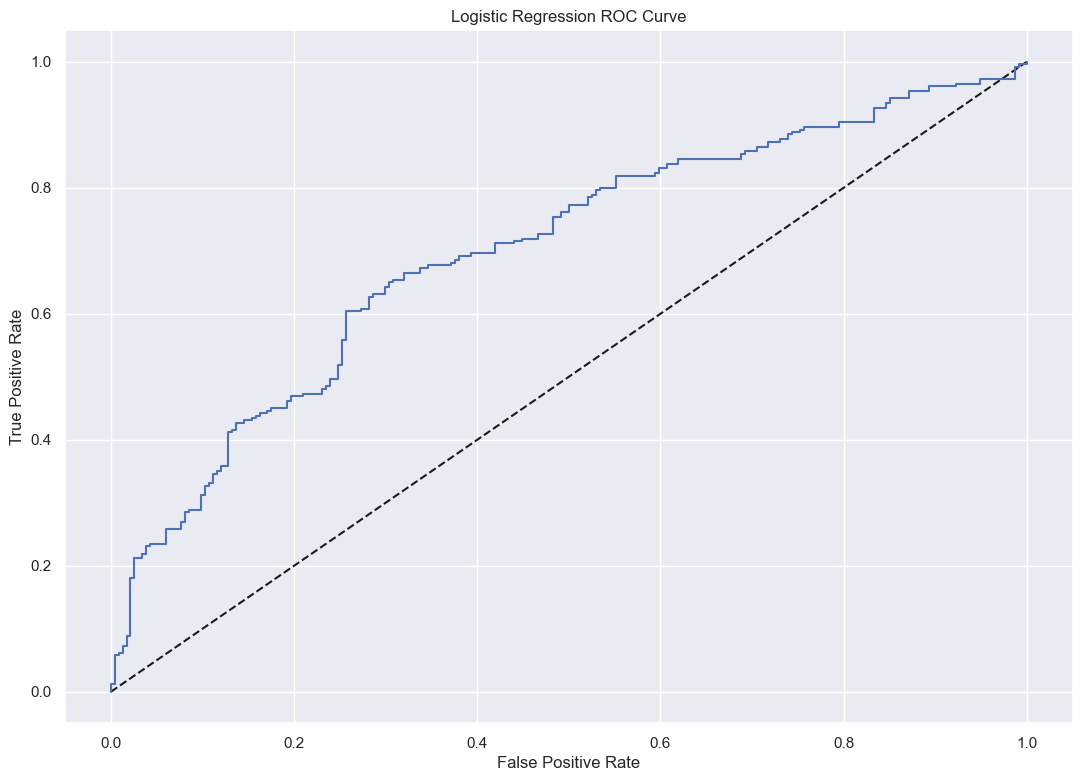

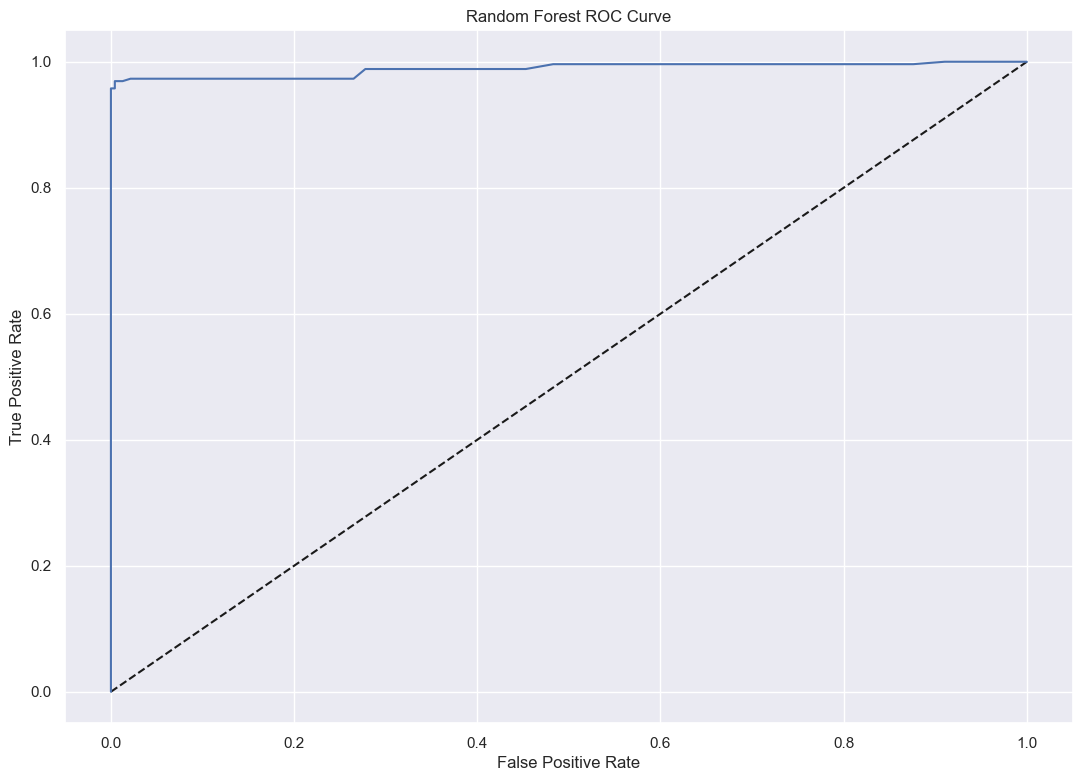

Text(0.5, 1.0, 'SVM ROC Curve')

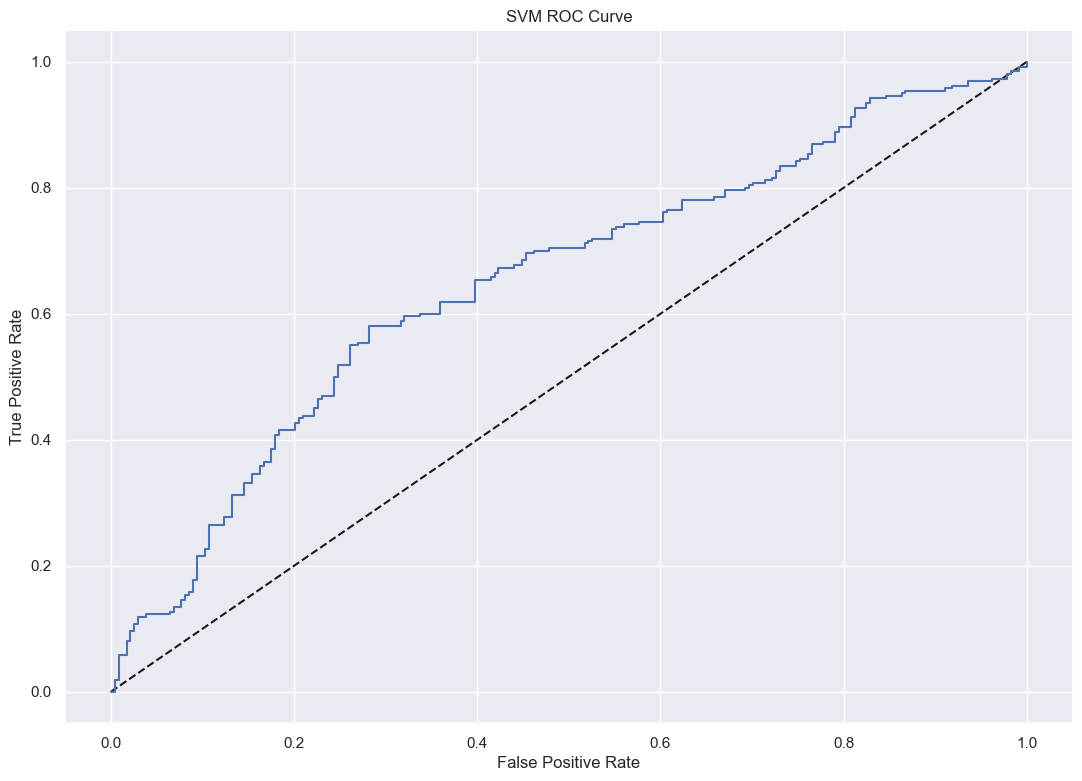

In [25]:
# K-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

# Splitting the data into train and test
X = df1.drop(['Attrition'], axis=1)
y = df1['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set using cross validation: {:.2f}'.format(cross_val_score(logreg, X_train, y_train, cv=10).mean()))
print('Confusion matrix of logistic regression classifier on test set: \n{}'.format(confusion_matrix(y_test, y_pred)))

# Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))
print('Accuracy of random forest classifier on train set: {:.2f}'.format(rf.score(X_train, y_train)))
print('Accuracy of random forest classifier on test set using cross validation: {:.2f}'.format(cross_val_score(rf, X_train, y_train, cv=10).mean()))
print('Confusion matrix of random forest classifier on test set: \n{}'.format(confusion_matrix(y_test, y_pred)))

# SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(X_test, y_test)))
print('Accuracy of SVM classifier on train set: {:.2f}'.format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set using cross validation: {:.2f}'.format(cross_val_score(svm, X_train, y_train, cv=10).mean()))
print('Confusion matrix of SVM classifier on test set: \n{}'.format(confusion_matrix(y_test, y_pred)))
# ROC curve
logreg.fit(X_train, y_train)
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

# ROC curve
rf.fit(X_train, y_train)
y_pred_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

# ROC curve
svm.fit(X_train, y_train)
y_pred_prob = svm.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')


In [ ]:
# df1['OverTime_Yes']

In [ ]:
# df.Attrition.unique()

In [ ]:
# df.info()

In [ ]:
# Dummy
# df['Attrition'] = df['Attrition'].replace({'Yes':1, 'No':0})

# df_new = pd.get_dummies(df, drop_first=True)
# df_new.head()

# df_new = df_new.replace({True:1, False:0})
# df_new.head()

In [ ]:
# # plot correlation matrix
# # corr = df_new.corr()
# # plt.figure(figsize=(100,30))
# # sns.heatmap(corr, annot=True, fmt='.1g', cmap='coolwarm', square=True)

# # Extract only the highly correlated features
# corr = df_new.corr()
# corr_target = abs(corr['Attrition'])
# relevant_features = corr_target[corr_target>0.1]
# print(relevant_features)

# # Extract the features
# X = df_new[relevant_features.index].drop('Attrition', axis=1)
# y = df_new['Attrition']

# # Split anda train the svm model
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1010)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Train the model
# model = SVC()
# model.fit(X_train, y_train)

# # Predictions
# predictions = model.predict(X_test)

# # Evaluation
# print(confusion_matrix(y_test, predictions))
# print(classification_report(y_test, predictions))

# # Accuracy
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, predictions)

In [ ]:
# Null values
# print("\n".join(df_new.columns.sort_values()))

In [ ]:
# X = df_new.drop('Attrition', axis=1)
# y = df_new['Attrition']

In [ ]:
# # Standarize the dara
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# # df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
# print(type(X_scaled))


In [ ]:
# y

In [ ]:
# Train Test Split
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)


In [26]:
# plot correlation matrix
# corr = df_new.corr()
# plt.figure(figsize=(100,30))
# sns.heatmap(corr, annot=True, fmt='.1g', cmap='coolwarm', square=True)

# Extract only the highly correlated features
corr = df_new.corr()
corr_target = abs(corr['Attrition'])
relevant_features = corr_target[corr_target>0.1]
print(relevant_features)

# Extract the features
X=df1.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)
y = df1['Attrition']

# Split anda train the svm model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1010)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = SVC()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

NameError: name 'df_new' is not defined

In [27]:
# Train random forest and print accuracy and confusion  matrix

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=250, max_depth=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred))


[[222  12]
 [  7 253]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       234
           1       0.95      0.97      0.96       260

    accuracy                           0.96       494
   macro avg       0.96      0.96      0.96       494
weighted avg       0.96      0.96      0.96       494

0.9615384615384616


In [28]:
# Train Models and report the accuracy
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
print("\nConfusion Matrix of Logistic Regression Model: \n", confusion_matrix(y_test, log_pred))
print("Accuracy of Logistic Regression Model: ", log_model.score(X_test, y_test))

svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
print("\nConfusion Matrix of SVC Model: \n", confusion_matrix(y_test, svc_pred))
print("Accuracy of SVC Model: ", svc_model.score(X_test, y_test))


Confusion Matrix of Logistic Regression Model: 
 [[151  83]
 [ 84 176]]
Accuracy of Logistic Regression Model:  0.6619433198380567

Confusion Matrix of SVC Model: 
 [[129 105]
 [ 83 177]]
Accuracy of SVC Model:  0.6194331983805668


In [29]:
# Dimensionality Reduction
from sklearn.decomposition import PCA


components = len(X.columns)-1
compos = []
lr_scores = []
svm_scores = []

for i in range(components-1):

    compos.append(components-i)

    pca = PCA(n_components=components-i)
    pca.fit(X)
    x_pca = pca.transform(X)

    # Train the model on the reduced data
    X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=101)
    log_model = LogisticRegression()
    log_model.fit(X_train, y_train)
    log_pred = log_model.predict(X_test)
    print(f"Accuracy of Logistic Regression Model for n_components = {components-i}: ", log_model.score(X_test, y_test))

    svc_model = SVC()
    svc_model.fit(X_train, y_train)
    svc_pred = svc_model.predict(X_test)
    print(f"Accuracy of SVC Model for n_components = {components-i} : ", svc_model.score(X_test, y_test))
    print("\n")

    lr_scores.append(log_model.score(X_test, y_test))
    svm_scores.append(svc_model.score(X_test, y_test))
    


Accuracy of Logistic Regression Model for n_components = 33:  0.7108108108108108
Accuracy of SVC Model for n_components = 33 :  0.6513513513513514


Accuracy of Logistic Regression Model for n_components = 32:  0.7108108108108108
Accuracy of SVC Model for n_components = 32 :  0.6513513513513514


Accuracy of Logistic Regression Model for n_components = 31:  0.7108108108108108
Accuracy of SVC Model for n_components = 31 :  0.6513513513513514


Accuracy of Logistic Regression Model for n_components = 30:  0.7121621621621622
Accuracy of SVC Model for n_components = 30 :  0.6513513513513514


Accuracy of Logistic Regression Model for n_components = 29:  0.7121621621621622
Accuracy of SVC Model for n_components = 29 :  0.6513513513513514


Accuracy of Logistic Regression Model for n_components = 28:  0.7121621621621622
Accuracy of SVC Model for n_components = 28 :  0.6513513513513514


Accuracy of Logistic Regression Model for n_components = 27:  0.7121621621621622
Accuracy of SVC Model for

#### TODO: Find optimal n

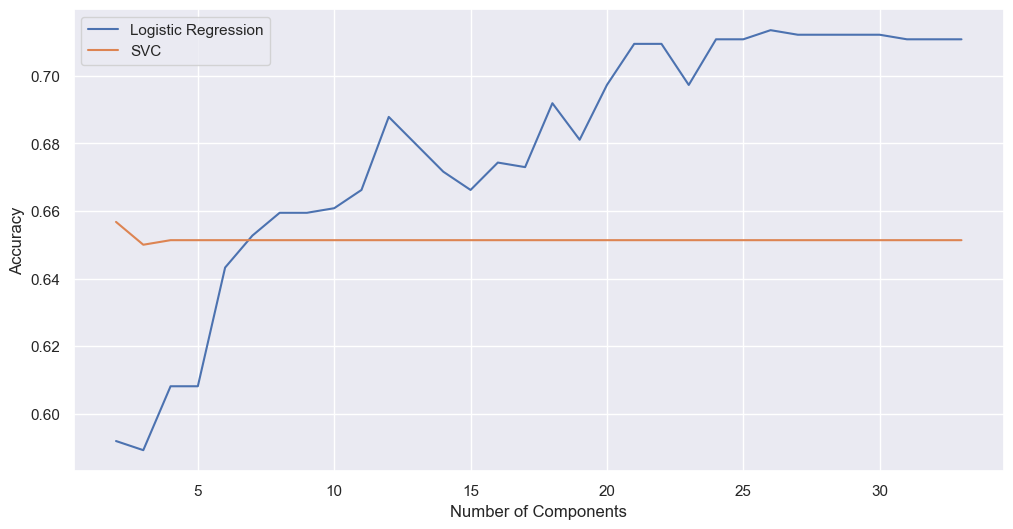

In [30]:
# Plot the accuracy
plt.figure(figsize=(12,6))
plt.plot(compos, lr_scores, label='Logistic Regression')
plt.plot(compos, svm_scores, label='SVC')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.legend()
plt.show()